# Ford Gobike Data
## by David Forino

## Introduction

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains over 183000 data points with 16 features for each one of them, including duration time, start and end time, gender and more. This analysis is useful to understand customer needs and create an effective marketing plan.

In [1]:
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902"
url += "-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
filename = url.split('/')[-1]

In [2]:
# Code used to download the data directly from the Udacity website
# import requests

# req = requests.get(url)

# with open(filename,'wb') as output_file:
#     output_file.write(req.content)

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('chained_assignment',None)

## Dataset exploration

In [4]:
# Loading dataset
df = pd.read_csv(filename)

In [5]:
# Show sample data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 183412 rows and 16 columns.


In [7]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# Statistcs
df[["duration_sec", "start_station_name", "end_station_name", "user_type", "member_gender", "bike_share_for_all_trip"]].describe(include='all')

,duration_sec,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,183412.000000,183215,183215,183412,175147,183412
unique,NaN,329,329,2,3,2
top,NaN,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,NaN,3904,4857,163544,130651,166053
mean,726.078435,NaN,NaN,NaN,NaN,NaN
std,1794.389780,NaN,NaN,NaN,NaN,NaN
min,61.000000,NaN,NaN,NaN,NaN,NaN
25%,325.000000,NaN,NaN,NaN,NaN,NaN
50%,514.000000,NaN,NaN,NaN,NaN,NaN
75%,796.000000,NaN,NaN,NaN,NaN,NaN


### What is the dataset structure?

> The dataset contains 183412 data points (one data point is a single trip) and 16 features associated to each of them.

### What are the main features of interest in the dataset?

> In this report we will focus primarely on the trip duration and the number of trips as per time of the day and day of the week.

### What features in the dataset may help to support the investigation into the features of interest?

> For this analysis we will focus on age, gender and user type to see if there is any correlation.

## Univariate Exploration

> In this section, we will investigate each of the above mentioned features. The main focus is to identify outliers, missing data etc. in order to clean the data first, then check its distribution and identify some initial trends.

### Trip Duration Distribution

**What is the distribution for trip duration? What is the 95th percentile?**

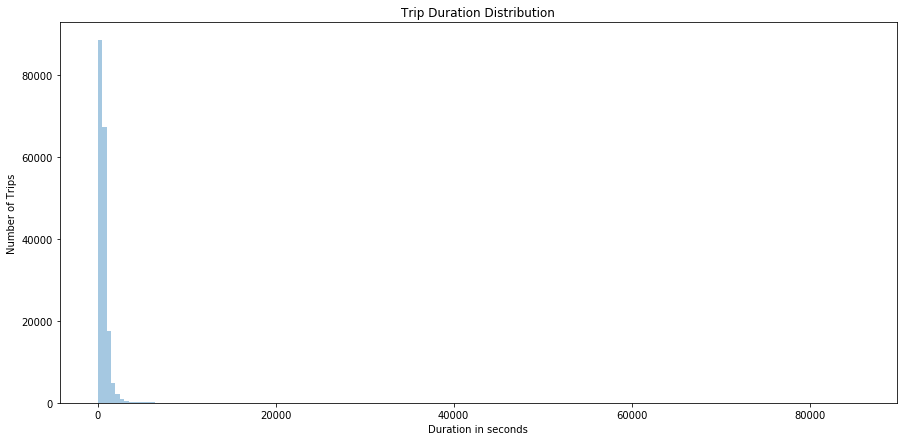

In [9]:
# trip duration
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df['duration_sec'], bins, kde=False)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips');

> From the figure above we can notice a very long tail on the right side. This indicates a high amount of outliers in the dataset. We will now zoom in a bit and focus on trips under 10000 seconds duration.

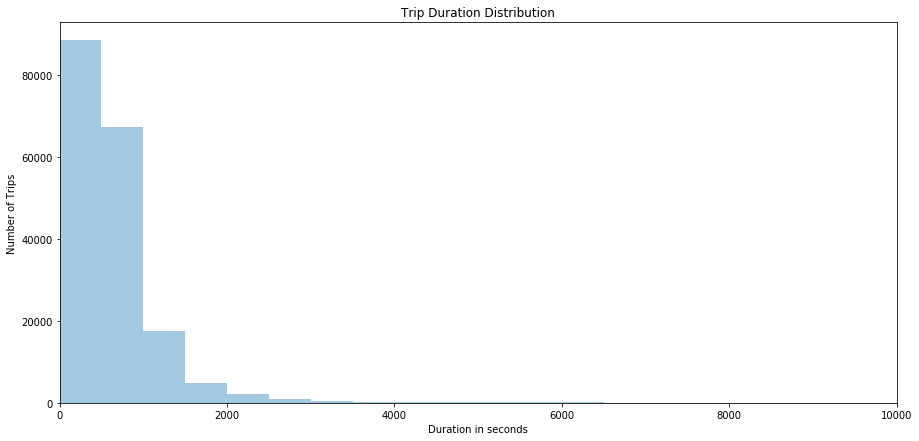

In [10]:
plt.figure(figsize=[15, 7])
sb.distplot(df['duration_sec'], bins, kde=False)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.xlim([0, 1e4]);

> We can still observe a long tail on the right. Since we have to focus on the majority of the trips, we will exclude trips longer then 6000 seconds (100 minutes).

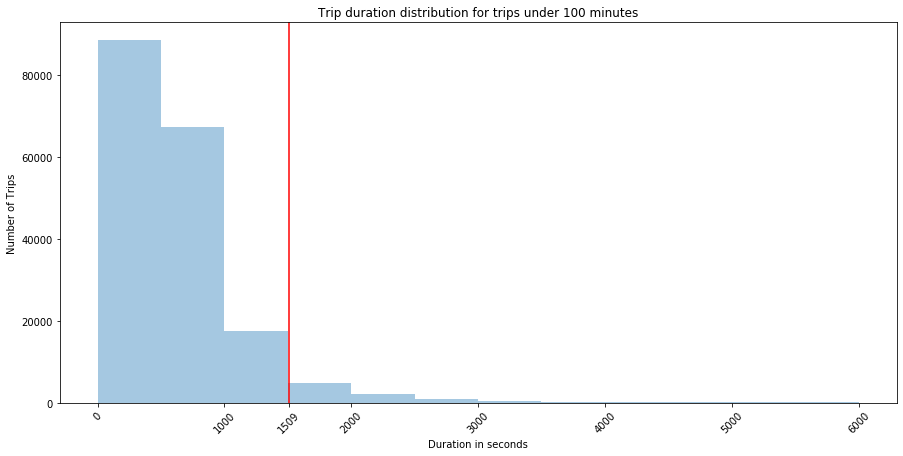

In [11]:
# Remove trips with a duration >= 6000 seconds
df_6000 = df.query('duration_sec < 6000')
df_6000.reset_index(inplace=True, drop=True)

bins = np.arange(0, df_6000['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['duration_sec'], bins, kde=False)
plt.title('Trip duration distribution for trips under 100 minutes')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')

quantile_95 = df_6000.duration_sec.quantile(.95)
plt.axvline(x=quantile_95, color='red')
            
plt.xticks([0, 1000, quantile_95, 2000, 3000, 4000, 5000, 6000], rotation=45)
plt.show()

> Since the distribution is still clearly right skewed, we will apply a logaritmic transformation along the x-axis.

### Insight 1
> **95% of trips' duration is below 1509 seconds, which is ~25 minutes.**

**What is the duration of most frequent rides?**

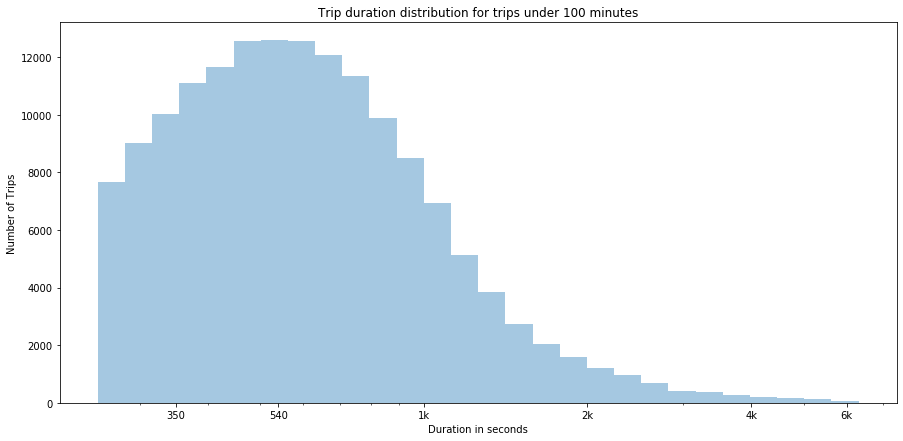

In [12]:
binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_6000['duration_sec'].max()) + binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['duration_sec'], bins, kde=False)
plt.title('Trip duration distribution for trips under 100 minutes')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([350, 540, 1e3, 2e3, 4e3, 6e3], [350, 540, '1k', '2k', '4k', '6k']);

> We can now see that the distribution is unimodal with mode about 540 seconds (equivalent to 9 minutes) with frequency of around 12K.

### Insight 2

> **Most frequent rides have a duration of 9 minutes.**

### Weekday Distribution

**Does the number of trips depends on the day of the week?**

In [13]:
# Change data type and derive weekday
df_6000["start_time"] = pd.to_datetime(df_6000['start_time'], format='%Y-%m-%d %H:%M:%S')
df_6000["end_time"] = pd.to_datetime(df_6000['end_time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
df_6000["weekday"] = pd.Categorical(df_6000["start_time"].dt.day_name(), 
                                    categories=[
                                        "Monday", "Tuesday", "Wednesday", 
                                        "Thursday", "Friday", "Saturday", "Sunday"
                                    ], ordered=True)

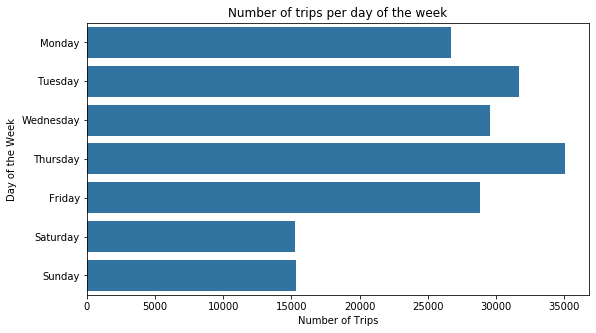

In [15]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[9, 5])
sb.countplot(data=df_6000, y="weekday", color=base_color)
plt.title("Number of trips per day of the week")
plt.xlabel('Number of Trips')
plt.ylabel('Day of the Week');

### Insight 3

> **Thursday is the day of the week with the highest number of trips. During the weekend the number is less than half of that.**

### Hourly Distribution

**Is there a specific time during the day in which there are significantly more trips?**

In [16]:
# Derive hour from time
df_6000["hour"] = df_6000["start_time"].dt.strftime('%H')

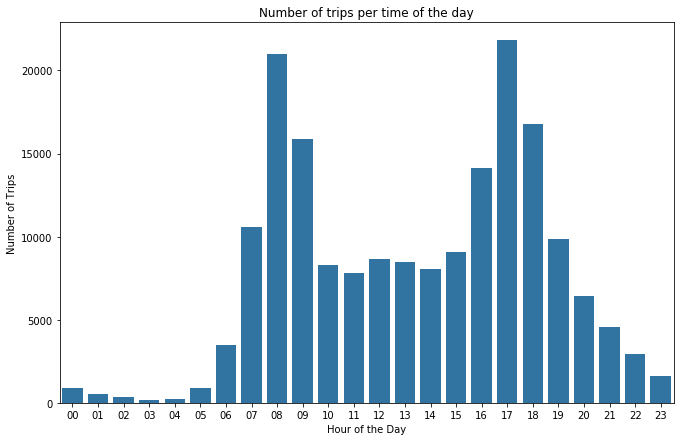

In [17]:
plt.figure(figsize=[11, 7])
sb.countplot(data=df_6000, x="hour", color=base_color)
plt.title("Number of trips per time of the day")
plt.ylabel('Number of Trips')
plt.xlabel('Hour of the Day');

> The above figure shows a bimodal distribution with peaks at 8 AM and 5 PM. This information combined with the previous one, give us a clear indication that the number of trips increase when people go or come back from work.

### Insight 4

> **Number of trips increase significantly during the time in which usually people go or come back from work.**

### Age Distribution

**In which age range are most of the users?**

In [18]:
# Calculate user age
df_6000['age'] = 2019 - df_6000['member_birth_year']

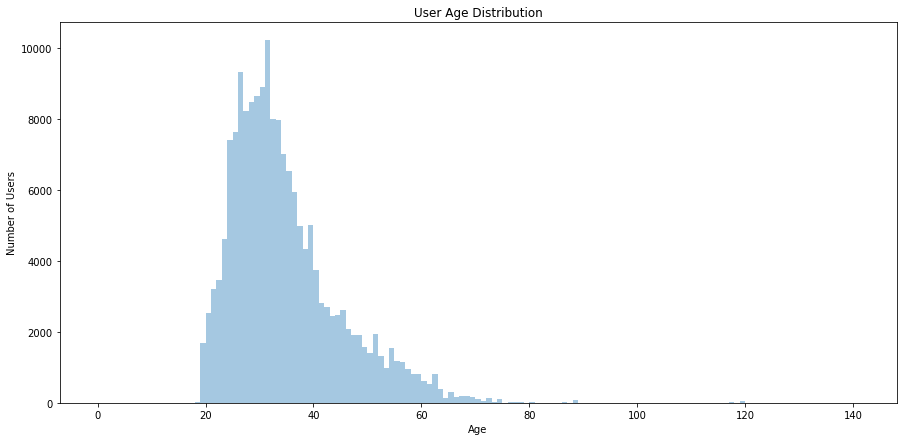

In [19]:
binsize = 1
bins = np.arange(0, df_6000['age'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['age'], bins, kde=False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users');

> Here we can observe that some data is wrong, above 120 Years old is not realistic. We will then delete age above 80 years old and treat it as missing values.

In [20]:
# Delete values above 80 years old
df_6000.loc[df_6000["age"] > 80, ['age']] = np.nan

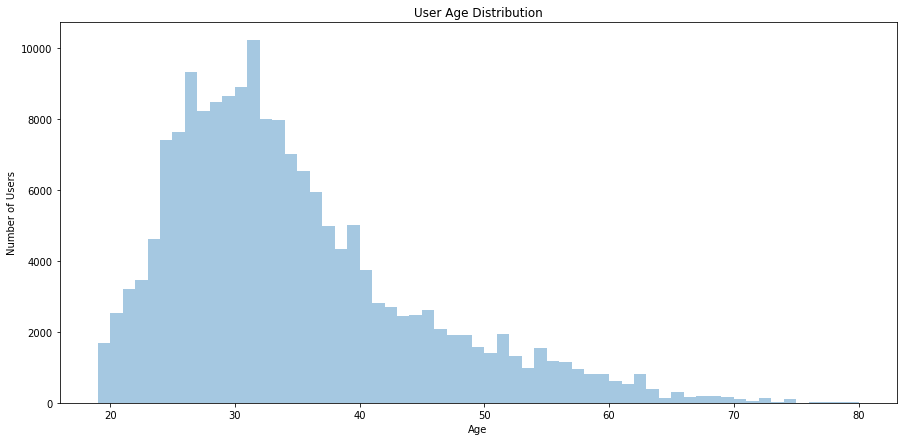

In [21]:
bins = np.arange(19, df_6000['age'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['age'], bins, kde=False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users');

> The age distribution is also a unimode distribution with mode about 32 years old.

### Insight 5

> **The majority of people is between 25 and 35 years old.**

### Gender Distribution

**What is the gender ratio between the users?**

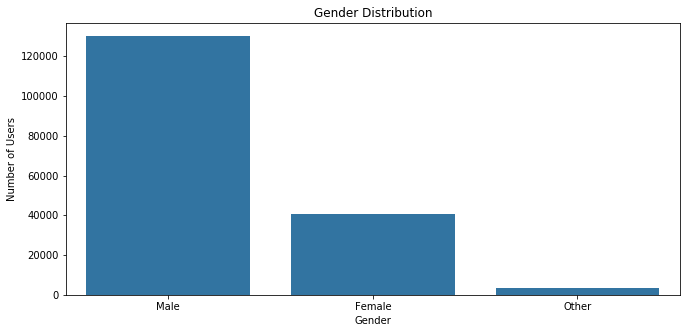

In [22]:
plt.figure(figsize=[11, 5])
sb.countplot(data=df_6000, x="member_gender", color=base_color)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users');

### Insight 6

> **The ratio between male and female users is about 3:1**

### User Type Distribution

**What is the ratio of subscribers vs casual customers?**

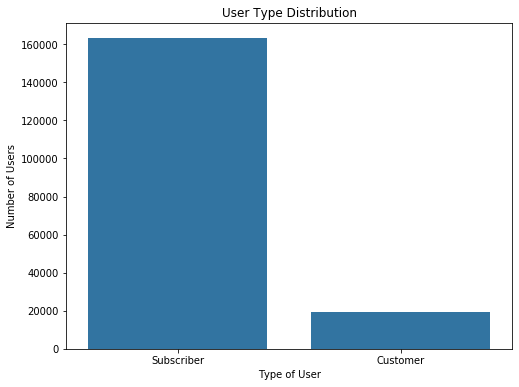

In [23]:
plt.figure(figsize=[8, 6])
sb.countplot(data=df_6000, x="user_type", color=base_color)
plt.title('User Type Distribution')
plt.xlabel('Type of User')
plt.ylabel('Number of Users');

### Insight 7

> **The ration between subscribers and single use customers is 8:1**

## Bivariate Exploration

> In this section, we will try to find relationships between pairs of variables in the
data.

**Does the average trip duration changes between subscribers and other customers?**

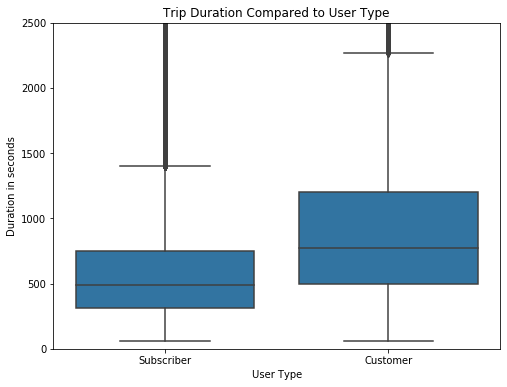

In [24]:
plt.figure(figsize=[8, 6])
sb.boxplot(data=df_6000, x='user_type', y='duration_sec', color=base_color)

# limit to reduce outliers
plt.ylim([0, 2500])
plt.title('Trip Duration Compared to User Type')
plt.xlabel('User Type')
plt.ylabel('Duration in seconds');

### Insight 8

> **Customers which are not subscribed have a median trip duration about 1.5 times longer compared to subscribers.**

**Does the average trip duration changes depending on gender?**

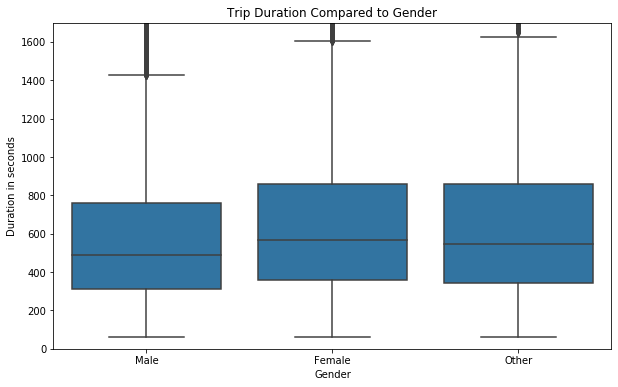

In [25]:
plt.figure(figsize=[10, 6])
sb.boxplot(data=df_6000, x='member_gender', y='duration_sec', color=base_color)
plt.title('Trip Duration Compared to Gender')

# limit to reduce outliers
plt.ylim([0, 1700])
plt.xlabel('Gender')
plt.ylabel('Duration in seconds');

### Insight 9

> **Males have a shorter median trip duration compared to females and others**

**Is there a difference in terms of number of trips per day of the week between subscribers and other customers?**

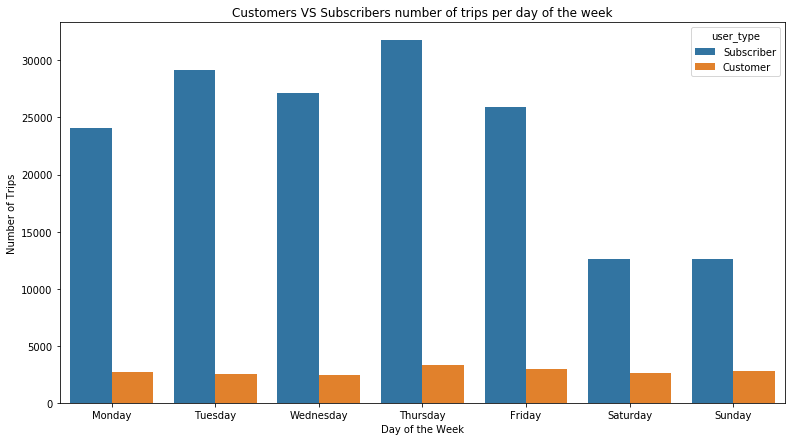

In [26]:
plt.figure(figsize=[13, 7])
sb.countplot(data=df_6000, x="weekday", hue="user_type")
plt.title("Customers VS Subscribers number of trips per day of the week")
plt.ylabel('Number of Trips')
plt.xlabel('Day of the Week');

### Insight 10

> **Casual customers don't have any specific day of the week in which day ride more often. Only subscribers ride more often during working days.**

**Does the trip duration depends upon age?**

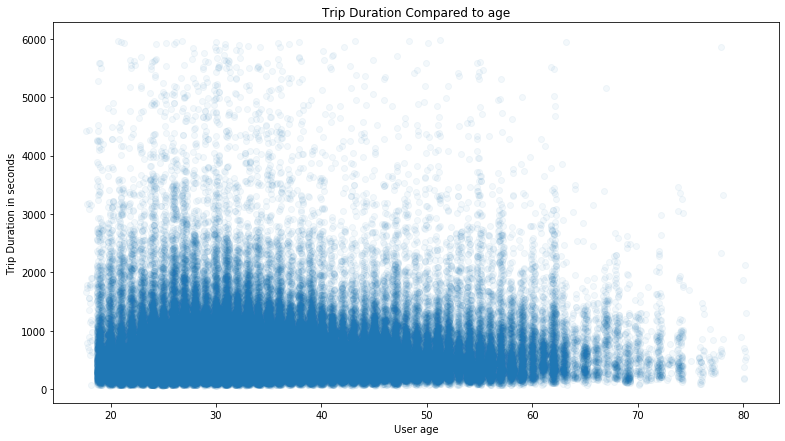

In [27]:
plt.figure(figsize=[13, 7])
sb.regplot(data=df_6000, x="age", y="duration_sec", x_jitter=0.3, fit_reg=False, scatter_kws={"alpha":1/20})
plt.title("Trip Duration Compared to age")
plt.ylabel('Trip Duration in seconds')
plt.xlabel('User age');

### Insight 11

> **Up to 30 years old we can notice a positive correlation between age and trip duration. It becomes instead an inverse correlation from 30 years old onwards.**

## Multivariate Exploration

> In this section we will investigate the data even further by combining 3 or more features together.

**Can we roughly estimate the trip duration based on the user data available?**

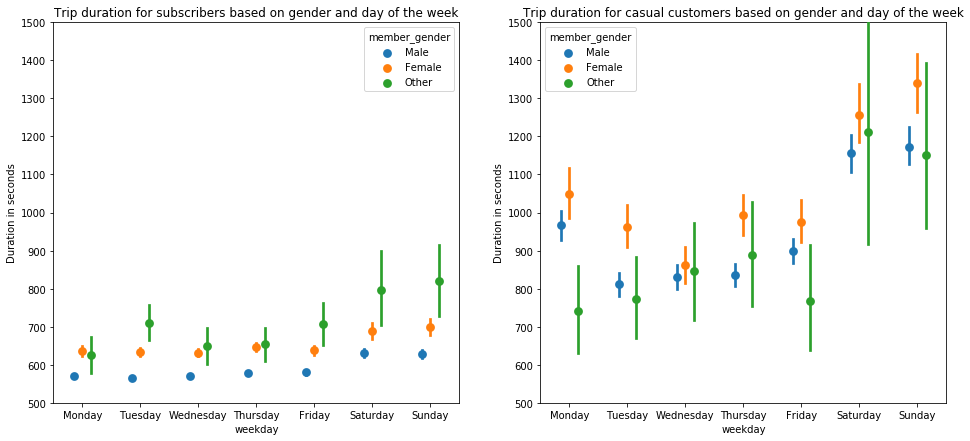

In [28]:
_, axis = plt.subplots(1, 2, figsize=[16, 7])
subscribers_df = df_6000.query("user_type=='Subscriber'")
customers_df = df_6000.query("user_type=='Customer'")

# subscribers
sb.pointplot(data=subscribers_df, x="weekday", y="duration_sec", 
             hue="member_gender", linestyles="", dodge=0.3, ax=axis[0])
axis[0].set_title("Trip duration for subscribers based on gender and day of the week")
axis[0].set_ylabel("Duration in seconds")
axis[0].set_ylim([500, 1500])
axis[0].set_yticks(list(range(500, 1501, 100)))

# casual customers
sb.pointplot(data=customers_df, x="weekday", y="duration_sec", 
             hue="member_gender", linestyles="", dodge=0.3, ax=axis[1])
axis[1].set_title("Trip duration for casual customers based on gender and day of the week")
axis[1].set_ylabel("Duration in seconds")
axis[1].set_ylim([500, 1500])
axis[1].set_yticks(list(range(500, 1501, 100)));

### Insight 12

> There is a clear distinction between subscribers and casual customers. During the weekend the time increases overall, even tho there are less trips. It is also worth to mention that users of other gender are more difficult to predict compared to males and females, but this is likely to be a problem of not enough data.

**Let's have a direct comparison for better visualization.**

/opt/anaconda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


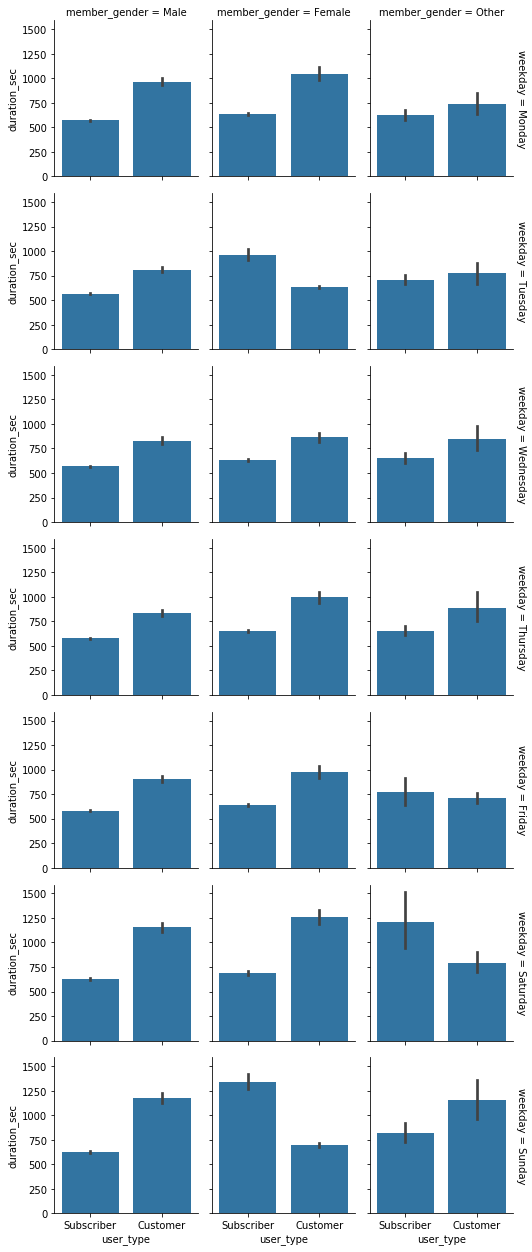

In [29]:
g = sb.FacetGrid(data=df_6000, row="weekday", col="member_gender", height=2.5, margin_titles=True)
g.map(sb.barplot, 'user_type', 'duration_sec');

### Insight 13

> With this plot we have a direct comparison and we can observe the following:
- On Tuesday and Sunday, female subscribers have a longer trip duration compared to casual female customers
- On Saturday, subscribers of other gender have a longer trip duration compared to casual customers of other gender

**Let's see if age can contribute as much as the other user data.**

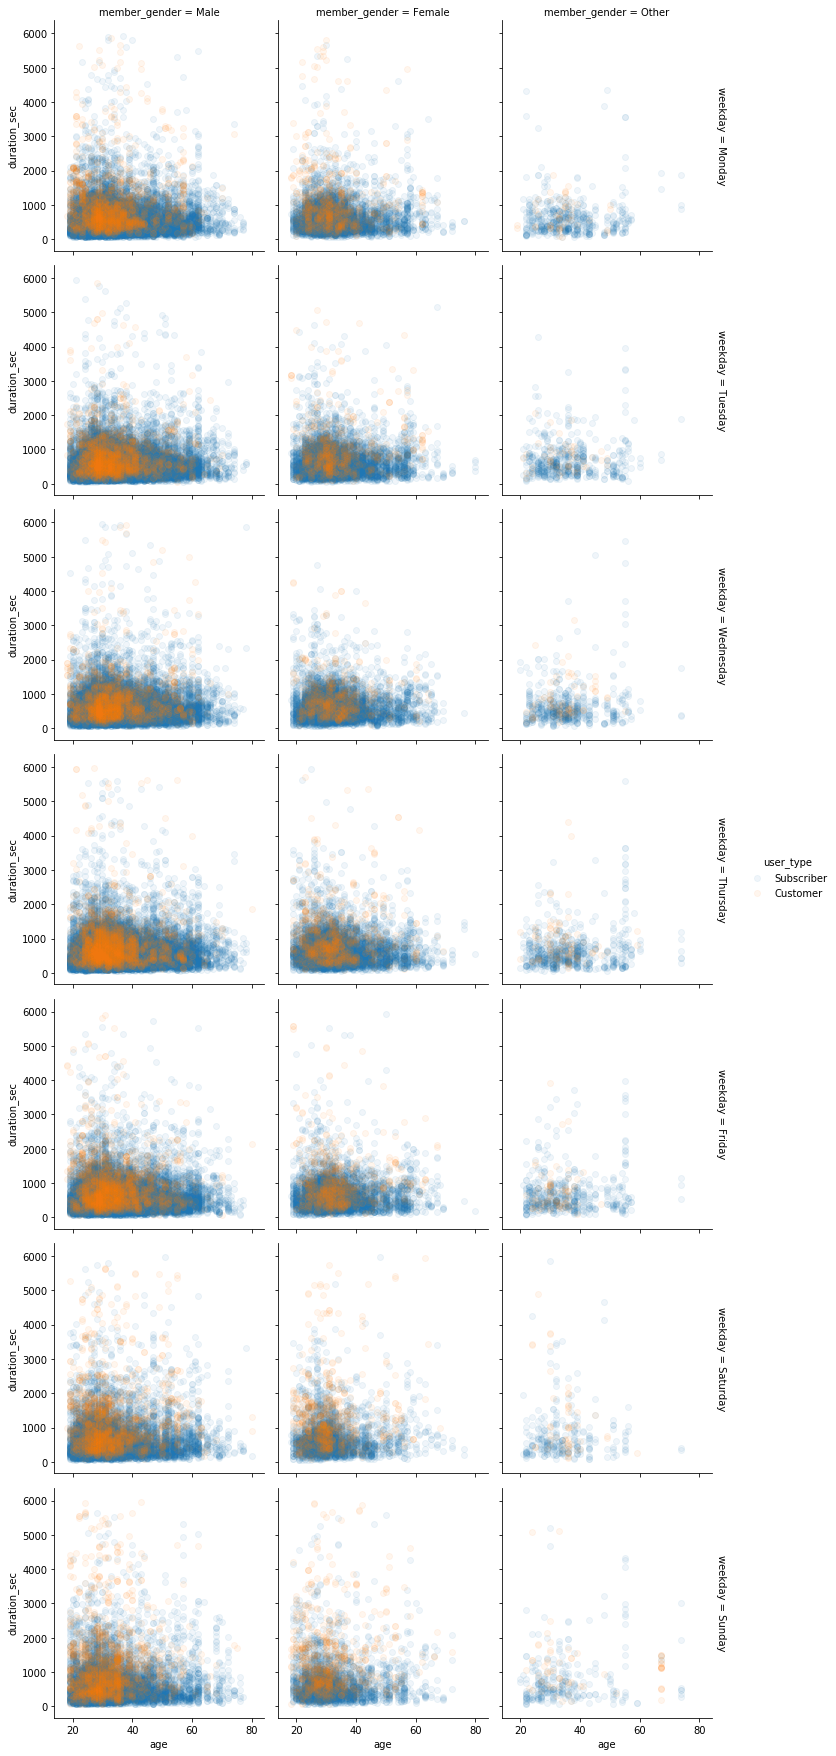

In [30]:
g = sb.FacetGrid(data=df_6000, row="weekday", col="member_gender", hue="user_type", height=3.5, margin_titles=True)
g.map(plt.scatter, 'age', 'duration_sec', alpha=1/15)
g.add_legend();

> With this graph we can confirm that age is not a key factor to estimate trip duration. With that said, remains valid the analysis done before which shows a switch from positive to negative correlation at the age of 30.

## Conclusion

With this report we found many insights that can be summaryzed as follows:
- 95% of trips' duration is below 1509 seconds, which is ~25 minutes
- Most frequent rides have a duration of 9 minutes
- Thursday is the day of the week with the highest number of trips, while during the weekend the number is less than half of that
- The above statement is valid only for subscribers, casual customers are consistent
- Number of trips increase significantly during the time in which usually people go or come back from work
- The majority of people riding is between 25 and 35 years old
- The ratio between male and female users is about 3:1
- The ration between subscribers and single use customers is 8:1
- Customers which are not subscribed have a median trip duration about 1.5 times longer compared to subscribers
- The above statement is not valid for females on Tuesday and Sunday as well as for people of other gender on Saturday
- Males have a shorter median trip duration compared to females and others
- Up to 30 years old we can notice a slight positive correlation between age and trip duration, which becomes instead a slight inverse correlation from 30 years old onwards
- Overall, based on day of the week, gender and user type we can have a rough estimation on the trip duration